In [1]:
import os
from typing import Dict, NamedTuple, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
class Config(NamedTuple):
    data_l: str = "../2way_anova_landscape.csv"
    data_p: str = "../2way_anova_portrait.csv"
    dirctory: str = "../images/dataviz"
    savefile: bool = False
    kwarg_savefig: Dict[str, Union[str, int, float]] = {
        "facecolor": "white",
        "dpi": 300,
        "bbox_inches": "tight",
        "pad_inches": 0.05
    }

In [3]:
conf = Config(savefile=True)

In [4]:
os.makedirs(conf.dirctory, exist_ok=True)

In [6]:
# load result data

res_l = pd.read_csv(conf.data_l, index_col=0)
res_p = pd.read_csv(conf.data_p, index_col=0)

In [15]:
res_p.head()

,time,size,n_clip
0,5.94,2.0,0.0
1,5.41,2.0,2.0
2,4.09,2.0,4.0
3,5.75,2.5,0.0
4,4.94,2.5,2.0


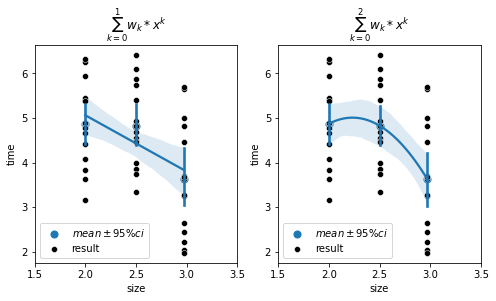

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

for idx, subplot in enumerate(ax):
    sns.regplot(data=res_p, x="size", y="time", x_estimator=np.mean, order=idx+1, ax=subplot, x_ci=95, label="$mean \pm 95$"+"%"+"$ci$")
    sns.scatterplot(data=res_p, x="size", y="time", color="k", ax=subplot, label="result")
    subplot.set_xlim([1.5, 3.5])
    title = "$\sum_{k=0}" + f"^{idx+1}" + "w_k * x^k$"
    subplot.set(title=title)
    subplot.legend()
    
if conf.savefile:
    plt.savefig(f"{conf.dirctory}/size.png", **conf.kwarg_savefig)

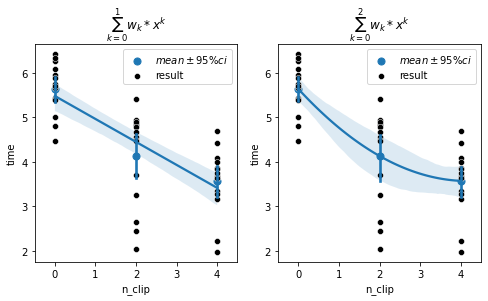

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

for idx, subplot in enumerate(ax):
    sns.regplot(data=res_p, x="n_clip", y="time", x_estimator=np.mean, order=idx+1, ax=subplot, x_ci=95, label="$mean \pm 95$"+"%"+"$ci$")
    sns.scatterplot(data=res_p, x="n_clip", y="time", color="k", ax=subplot, label="result")
    subplot.set_xlim([-0.5, 4.5])
    title = "$\sum_{k=0}" + f"^{idx+1}" + "w_k * x^k$"
    subplot.set(title=title)
    subplot.legend()
    
if conf.savefile:
    plt.savefig(f"{conf.dirctory}/n_clip.png", **conf.kwarg_savefig)

In [20]:
df = res_p.assign(batch = pd.Series([i // 9 + 1 for i in np.arange(len(res_p))]))

In [22]:
df.head()

,time,size,n_clip,batch
0,5.94,2.0,0.0,1
1,5.41,2.0,2.0,1
2,4.09,2.0,4.0,1
3,5.75,2.5,0.0,1
4,4.94,2.5,2.0,1


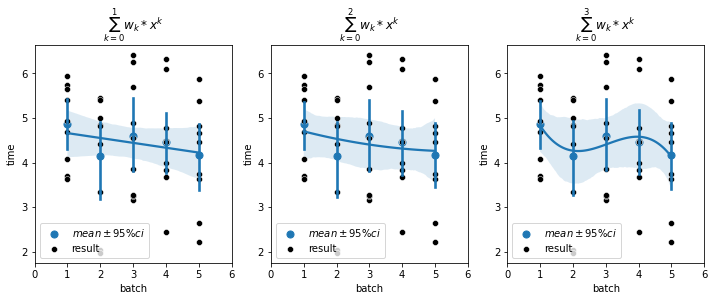

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for idx, subplot in enumerate(ax):
    subplot.set_xlim([0, 6])
    sns.regplot(data=df, x="batch", y="time", x_estimator=np.mean, order=idx+1, ax=subplot, x_ci=95, label="$mean \pm 95$"+"%"+"$ci$")
    sns.scatterplot(data=df, x="batch", y="time", color="k", ax=subplot, label="result")
    title = "$\sum_{k=0}" + f"^{idx+1}" + "w_k * x^k$"
    subplot.set(title=title)
    subplot.legend()
    
if conf.savefile:
    plt.savefig(f"{conf.dirctory}/batch.png", **conf.kwarg_savefig)

In [26]:
l_x = [
    sm.add_constant(np.log(df.loc[:, "size"])),
    sm.add_constant(np.log(df.loc[:, "n_clip"]  + 1)),
    sm.add_constant(np.log(df.loc[:, "batch"]))
]
y = np.log(df.loc[:, "time"])

params = [sm.OLS(y, x).fit().params for x in l_x]

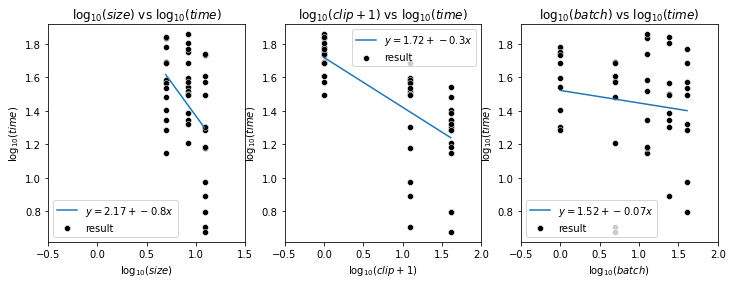

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, x in enumerate(l_x):
    x_range = np.linspace(x.iloc[:, -1].min(), x.iloc[:, -1].max(), 1000)
    
    ax[i].set_xlim([-0.5, np.ceil(x.iloc[:, -1].max() / 0.5) * 0.5])
    label = "$y=" + f"{params[i][0].round(2)}" + "+" + f"{params[i][1].round(2)}" + "x$"
    xlabel = "$\log_{10}(" + f"{('size', 'clip', 'batch')[i]}" + f"{['', ' +1', ''][i]})$"
    ylabel = "$\log_{10}(time)$"
    title = f"{xlabel} vs {ylabel}"
    ax[i].plot(
        x_range, params[i][0] + params[i][1] * x_range, label=label, alpha=1
    )
    sns.scatterplot(x=x.iloc[:, -1], y=y, ax=ax[i], color="k", label="result")
    ax[i].set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax[i].legend()
    
if conf.savefile:
    plt.savefig(f"{conf.dirctory}/log_log.png", **conf.kwarg_savefig)

- ↑これからは特に何もわからなさそう